In [42]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use
#for missing zipcodes
import geopy

# Zillow Dataset

In [43]:
df_zillow=pd.read_excel('Zip_Zhvi_2bedroom.xlsx')

In [44]:
df_zillow

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,...,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,93454,80532,Drake,CO,Fort Collins,Larimer,8942,NaN,NaN,NaN,...,270800,272200,274700,281300.0,286200,285300,284100,284800,285800,287500
8942,62556,12429,Port Ewen,NY,Kingston,Ulster,8943,64500.0,64000.0,63400.0,...,144500,144600,145600,146400.0,146600,147100,149100,151700,153300,153800
8943,99032,97028,Rhododendron,OR,Portland,Clackamas,8944,NaN,NaN,NaN,...,318200,315000,312300,308800.0,304700,302400,302300,303300,307400,312600
8944,58333,1338,Shelburne Falls,MA,Greenfield Town,Franklin,8945,91400.0,91000.0,90600.0,...,185700,184600,184800,188600.0,193000,195800,197600,198300,198300,198500


The dataset has 8946 rows and 262 columns. Surely, not every column is of our use

since we only want to keep our focus to New York, let's filter the rest of the districts

In [45]:
df_zillow=df_zillow[df_zillow['City']=='New York']

One of the most common problem that we usually encounter is of missing values, let's check if we have some missing values or not.

In [46]:
if (df_zillow.isna().sum().sum() == 0) == True:
  print("There are no missing data, we're lucky!")
else:
    miss_col=df_zillow.isnull().any().sum()
    print(f"This need further investigation {miss_col} of the coulmns have missing values")

This need further investigation 134 of the coulmns have missing values


out of all these columns we only need the first 7 and the last most column which represents the most latest price of these properties

In [47]:
#let's shrink our dataset
df_zillow_shrinked=df_zillow.iloc[:,:7]
df_zillow_shrinked[df_zillow.columns[-1]]=df_zillow.iloc[:,-1]

In [48]:
df_zillow_shrinked.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2017-06-01 00:00:00
0,61639,10025,New York,NY,New York,New York,1,1431000
2,61637,10023,New York,NY,New York,New York,3,2142300
13,61703,10128,New York,NY,New York,New York,14,1787100
14,61625,10011,New York,NY,New York,New York,15,2480400
20,61617,10003,New York,NY,New York,New York,21,2147000


lucky enough, the shriked dataset has no missing value

Let's explore the bit of the data before moving to the other dataset

In [49]:
df_zillow_shrinked['SizeRank'].head(5)

0      1
2      3
13    14
14    15
20    21
Name: SizeRank, dtype: int64

5 of the Regions are in top 25, indeed New York City is a good place to invest

Now is the good time to perform some exploratory data anlysis on the zillow data set and observe how the values of the properties have been appreciated in a period of 10 years. We are using the analysis for 10 years from the year 2007-06 to 2017-06 because lucky enough, these columns have none empty values. Let's explore the data

In [50]:
df_zlw_appr=df_zillow.iloc[:,-121:].transpose()
df_zlw_appr.columns=df_zillow.iloc[:,0]

In [51]:
df_zlw_appr.iloc[:,:10].iplot(title='Value of top 10 zipcodes appreciated over 10 years')

this tells a great story, indeed the values of the properties have been appreciated and NYC is a good place to invest.

# AirBnb Dataset

Now it's time to explore the AirBnb Dataset

In [52]:
df_airbnb=pd.read_csv('listings.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (43,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.



In [53]:
df_airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190708031610,2019-07-09,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
4,5022,https://www.airbnb.com/rooms/5022,20190708031610,2019-07-08,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10


It looks like a messy dataset with alot of features, we need to shrink our focus to only most relevant ones

In [54]:
columns_needed=['id','city','state','zipcode','room_type','bedrooms','latitude','longitude','price','availability_365']

In [55]:
cols_need = ['zipcode',
        "bedrooms",
        "neighbourhood_cleansed",
        "neighbourhood_group_cleansed",
        "latitude", 
        "longitude",
        "property_type", 
        "price", 
        'availability_365']

In [56]:
df_airbnb_shrinked=df_airbnb[cols_need]

Since we only need to analyse the 2 bedrooms, let's shrink our attention

In [57]:
df_airbnb_shrinked=df_airbnb_shrinked[df_airbnb_shrinked['bedrooms'] == 2.]

In [58]:
df_airbnb_shrinked

,zipcode,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,availability_365
19,10029,2.0,East Harlem,Manhattan,40.79685,-73.94872,Apartment,$190.00,249
48,11221,2.0,Bedford-Stuyvesant,Brooklyn,40.68554,-73.94090,Townhouse,$115.00,0
52,11206,2.0,Williamsburg,Brooklyn,40.70420,-73.93560,Loft,$228.00,140
61,10001,2.0,Chelsea,Manhattan,40.74623,-73.99530,Apartment,$375.00,180
62,10162,2.0,Upper East Side,Manhattan,40.77065,-73.95269,Apartment,$250.00,231
...,...,...,...,...,...,...,...,...,...
48804,10004,2.0,Financial District,Manhattan,40.70597,-74.01562,Apartment,$99.00,22
48806,11229,2.0,Sheepshead Bay,Brooklyn,40.59731,-73.93381,House,$140.00,171
48813,11691,2.0,Bayswater,Queens,40.61113,-73.76546,Apartment,$80.00,87
48860,10044,2.0,Roosevelt Island,Manhattan,40.76688,-73.94688,Condominium,$145.00,30


In [59]:
#let's check for the missing values
df_airbnb_shrinked.isnull().sum()

zipcode                         50
bedrooms                         0
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
property_type                    0
price                            0
availability_365                 0
dtype: int64

Dang! 50 Zipcodes are missing

let's try to find those missing zipcodes by the aid of geopy library to perform the process of reverse geocoding

In [60]:
from geopy import Nominatim
#give any arbitrary name
geolocator =Nominatim(user_agent='geolocator/1')

In [61]:
def zip_imputer(cols):
    lat=cols[0]
    long=cols[1]
    zipcode=cols[2]
    if pd.isnull(zipcode):
        cord=str(lat)+','+str(long)
        location=geolocator.reverse(cord)
        zip_=location.address.split(',')[-2].strip()
        return zip_
    else:
        return zipcode

In [62]:
df_airbnb_shrinked['zipcode']=df_airbnb_shrinked[['latitude','longitude','zipcode']].apply(zip_imputer,axis=1)

In [63]:
df_airbnb_shrinked.shape

(6497, 9)

Now it's time to combine the two dataset

In [64]:
#let's first make the names of the columns of the two datasets consistent
df_zillow_shrinked = df_zillow_shrinked.rename({'RegionName':'zipcode'}, axis=1)
df_zillow_shrinked['zipcode'] = df_zillow_shrinked['zipcode'].astype('str')
df_zillow_shrinked.drop(['RegionID'],axis=1,inplace=True)

In [65]:
#let's rename the name of the final column to something that makes more sense
df_zillow_shrinked.columns=['zipcode','City','State','Metro','CountyName','SizeRank','Sell_price']

It is time to have a look at the shape of the datasets to ensure we don't miss anything important while merging

In [66]:
df_airbnb_shrinked.shape

(6497, 9)

In [67]:
df_zillow_shrinked.shape

(25, 7)

In [68]:
zlw_bnb = pd.merge(df_zillow_shrinked, df_airbnb_shrinked, how = 'inner', on = 'zipcode')
zlw_bnb.shape

(1105, 15)

In [69]:
zlw_bnb.isnull().sum()

zipcode                         0
City                            0
State                           0
Metro                           0
CountyName                      0
SizeRank                        0
Sell_price                      0
bedrooms                        0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
price                           0
availability_365                0
dtype: int64

Before we move on to the exploratory data analysis of the merged dataset, let's we first make the format of the price column correct in the dataframe. The price column has values with dollar sign, which can confuse the plotting process. We first need to remove the $ sign and then clean the data from all of the comma separated values

In [73]:
#to remove $ sign
zlw_bnb['price']=zlw_bnb['price'].apply(lambda x: x.split('$')[1])
#to remove comma separated values
zlw_bnb['price']=zlw_bnb['price'].astype(str).apply(lambda x : float(x.replace(',','')))
#to make the price as float
zlw_bnb['price']=zlw_bnb['price'].astype('float')

Since the data is in good shape now, let's explore how the dataset is distributed and how many outliers each region have.

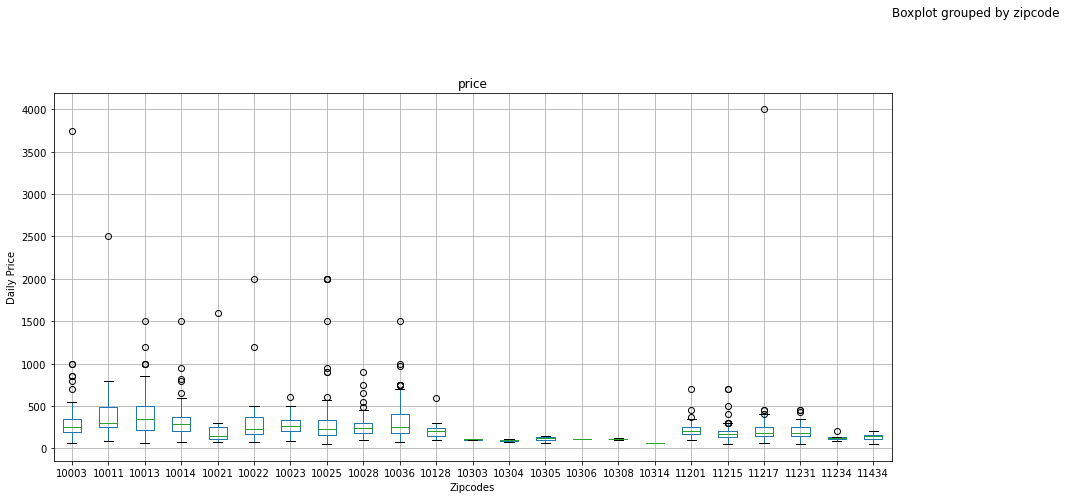

In [74]:
fig = plt.figure(figsize=(32,15))
ax_1 = fig.add_subplot(221);
zlw_bnb.boxplot(column='price', by='zipcode',ax=ax_1)
ax_1.set_xlabel("Zipcodes");
ax_1.set_ylabel("Daily Price");

There indeed are outliers. It makes perfect sense as in real world scenario not all houses worth same. Some are more developed than the others.

# Metrics

For now we have done enough of the visual analyses. Now it is time to dive deep and explore some metrics

The first metric we are going to use is **Rate**. The reason to use this metric is to emphasis on the fact that all the real world assets either appreciates or depriciates with time. This is due to the fact that the money has time value. The value of assets change with time. The rate metric holds some water because it embraces the time value of money. In our data, the rate metric will tell us the average rate by which the value of the properties in an particular region has been appreciated or depriciated.

\begin{equation*}
Rate =\frac{Most latest Property Value -  Property Value in Past}{Property Value in Past * Difference of Years}
\end{equation*}

Since we want to keep the analysis scalabale. Let's build a function that first check the columns with the zero missing values and then calculate rate out of it

In [75]:
def rate(df,n):
    null_check = df.isnull().sum() # to check the presence of null value in any particular year
    null_filter = null_check[null_check == 0] # this will filter out all the columns with missing values

    df_ = df[null_filter.index]
    y=df_.iloc[:,df_.shape[1]-1]
    x=df_.iloc[:,df_.columns.get_loc("SizeRank")+1]
    rate=(y-x)/(x*n)
    return(rate)

In [76]:
df_zillow_shrinked['rate']=rate(df_zillow,10)

In [77]:
df_zillow_shrinked

,zipcode,City,State,Metro,CountyName,SizeRank,Sell_price,rate
0,10025,New York,NY,New York,New York,1,1431000,0.061988
2,10023,New York,NY,New York,New York,3,2142300,0.051807
13,10128,New York,NY,New York,New York,14,1787100,0.075120
14,10011,New York,NY,New York,New York,15,2480400,0.063766
20,10003,New York,NY,New York,New York,21,2147000,0.056979
31,11201,New York,NY,New York,Kings,32,1420700,0.136626
51,11234,New York,NY,New York,Kings,52,476900,0.016147
67,10314,New York,NY,New York,Richmond,68,357300,0.013717
70,11215,New York,NY,New York,Kings,71,1070800,0.112840
108,10028,New York,NY,New York,New York,109,2083900,0.052936
